# Statement
size of dataset: 452 txt files

how I gathered data: With the keyword "Istanbul", I scraped 110 books from OpenLibrary and downloaded 41 books and 105 poems from websites. Then I extracted txt files according to the input 33 keywords about objects in Istanbul(balcony, bench, bicycle, billboard, bus stop, cafe, carpet, cash machine, cat, cat food, cat house, chair, coffee, dilapidated building, ferry, fountain, garbage, garbage can, graffiti, hanging clothes, hawker, kiosk, lamp post, mosaic, parasol, postbox, mosaic tiles, staircase, table, tea, tram, umbrella, vending cart)

datatype of the dataset: text format txt

In [2]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=9eb211fac85208014ae5ad4a0bb967358946cc0fda81b4dcc8370b28f5c3626c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b4\aa\7a\d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


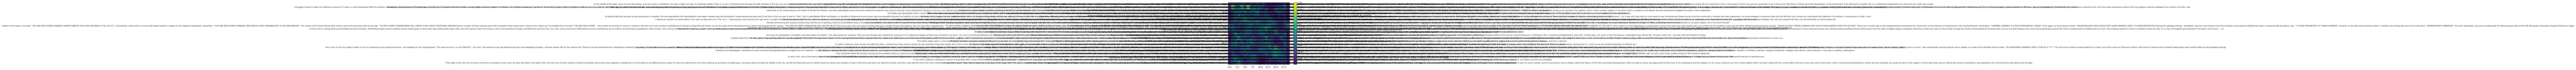

In [6]:
import os
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from minisom import MiniSom
import matplotlib.pyplot as plt

# Set the path to the folder containing text files
folder_path = "C:/Users/user/Documents/SOM/objects"

# Initialize a list to hold the text content of each file
text_files = []

# Iterate through each file in the folder and extract its text content
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text_files.append(text)

# Vectorize the text content of the files
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_files).toarray()

# Train the SOM
som_shape = (20, 20)
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)

# Map each document to its corresponding SOM neuron
document_neurons = []
for i in range(X.shape[0]):
    document_neurons.append(som.winner(X[i]))

# Create a matrix to store the most similar documents for each SOM neuron
most_similar_docs = []
for i in range(som_shape[0]):
    row = []
    for j in range(som_shape[1]):
        doc_indices = [idx for idx, n in enumerate(document_neurons) if n == (i, j)]
        if len(doc_indices) > 0:
            row.append(text_files[doc_indices[0]])
        else:
            row.append("")
    most_similar_docs.append(row)

# Visualize the SOM using the U-matrix
umatrix = som.distance_map()
plt.imshow(umatrix)
plt.colorbar()

# Display the most similar documents for each SOM neuron
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        plt.text(j, i, most_similar_docs[i][j], ha="center", va="center", fontsize=8)
plt.show()


In [14]:
# Set the size of the figure to be 20 inches wide and 20 inches tall
fig = plt.figure(figsize=(50, 50))

# Create the plot as before
umatrix = som.distance_map()
plt.imshow(umatrix)
plt.colorbar()
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        plt.text(j, i, most_similar_docs[i][j], ha="center", va="center", fontsize=12)

plt.savefig('umatrix.png')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2892\1405568454.py:12: UserWarning: Glyph 12 () missing from current font.
  plt.savefig('umatrix.png')


## Main code

Training...


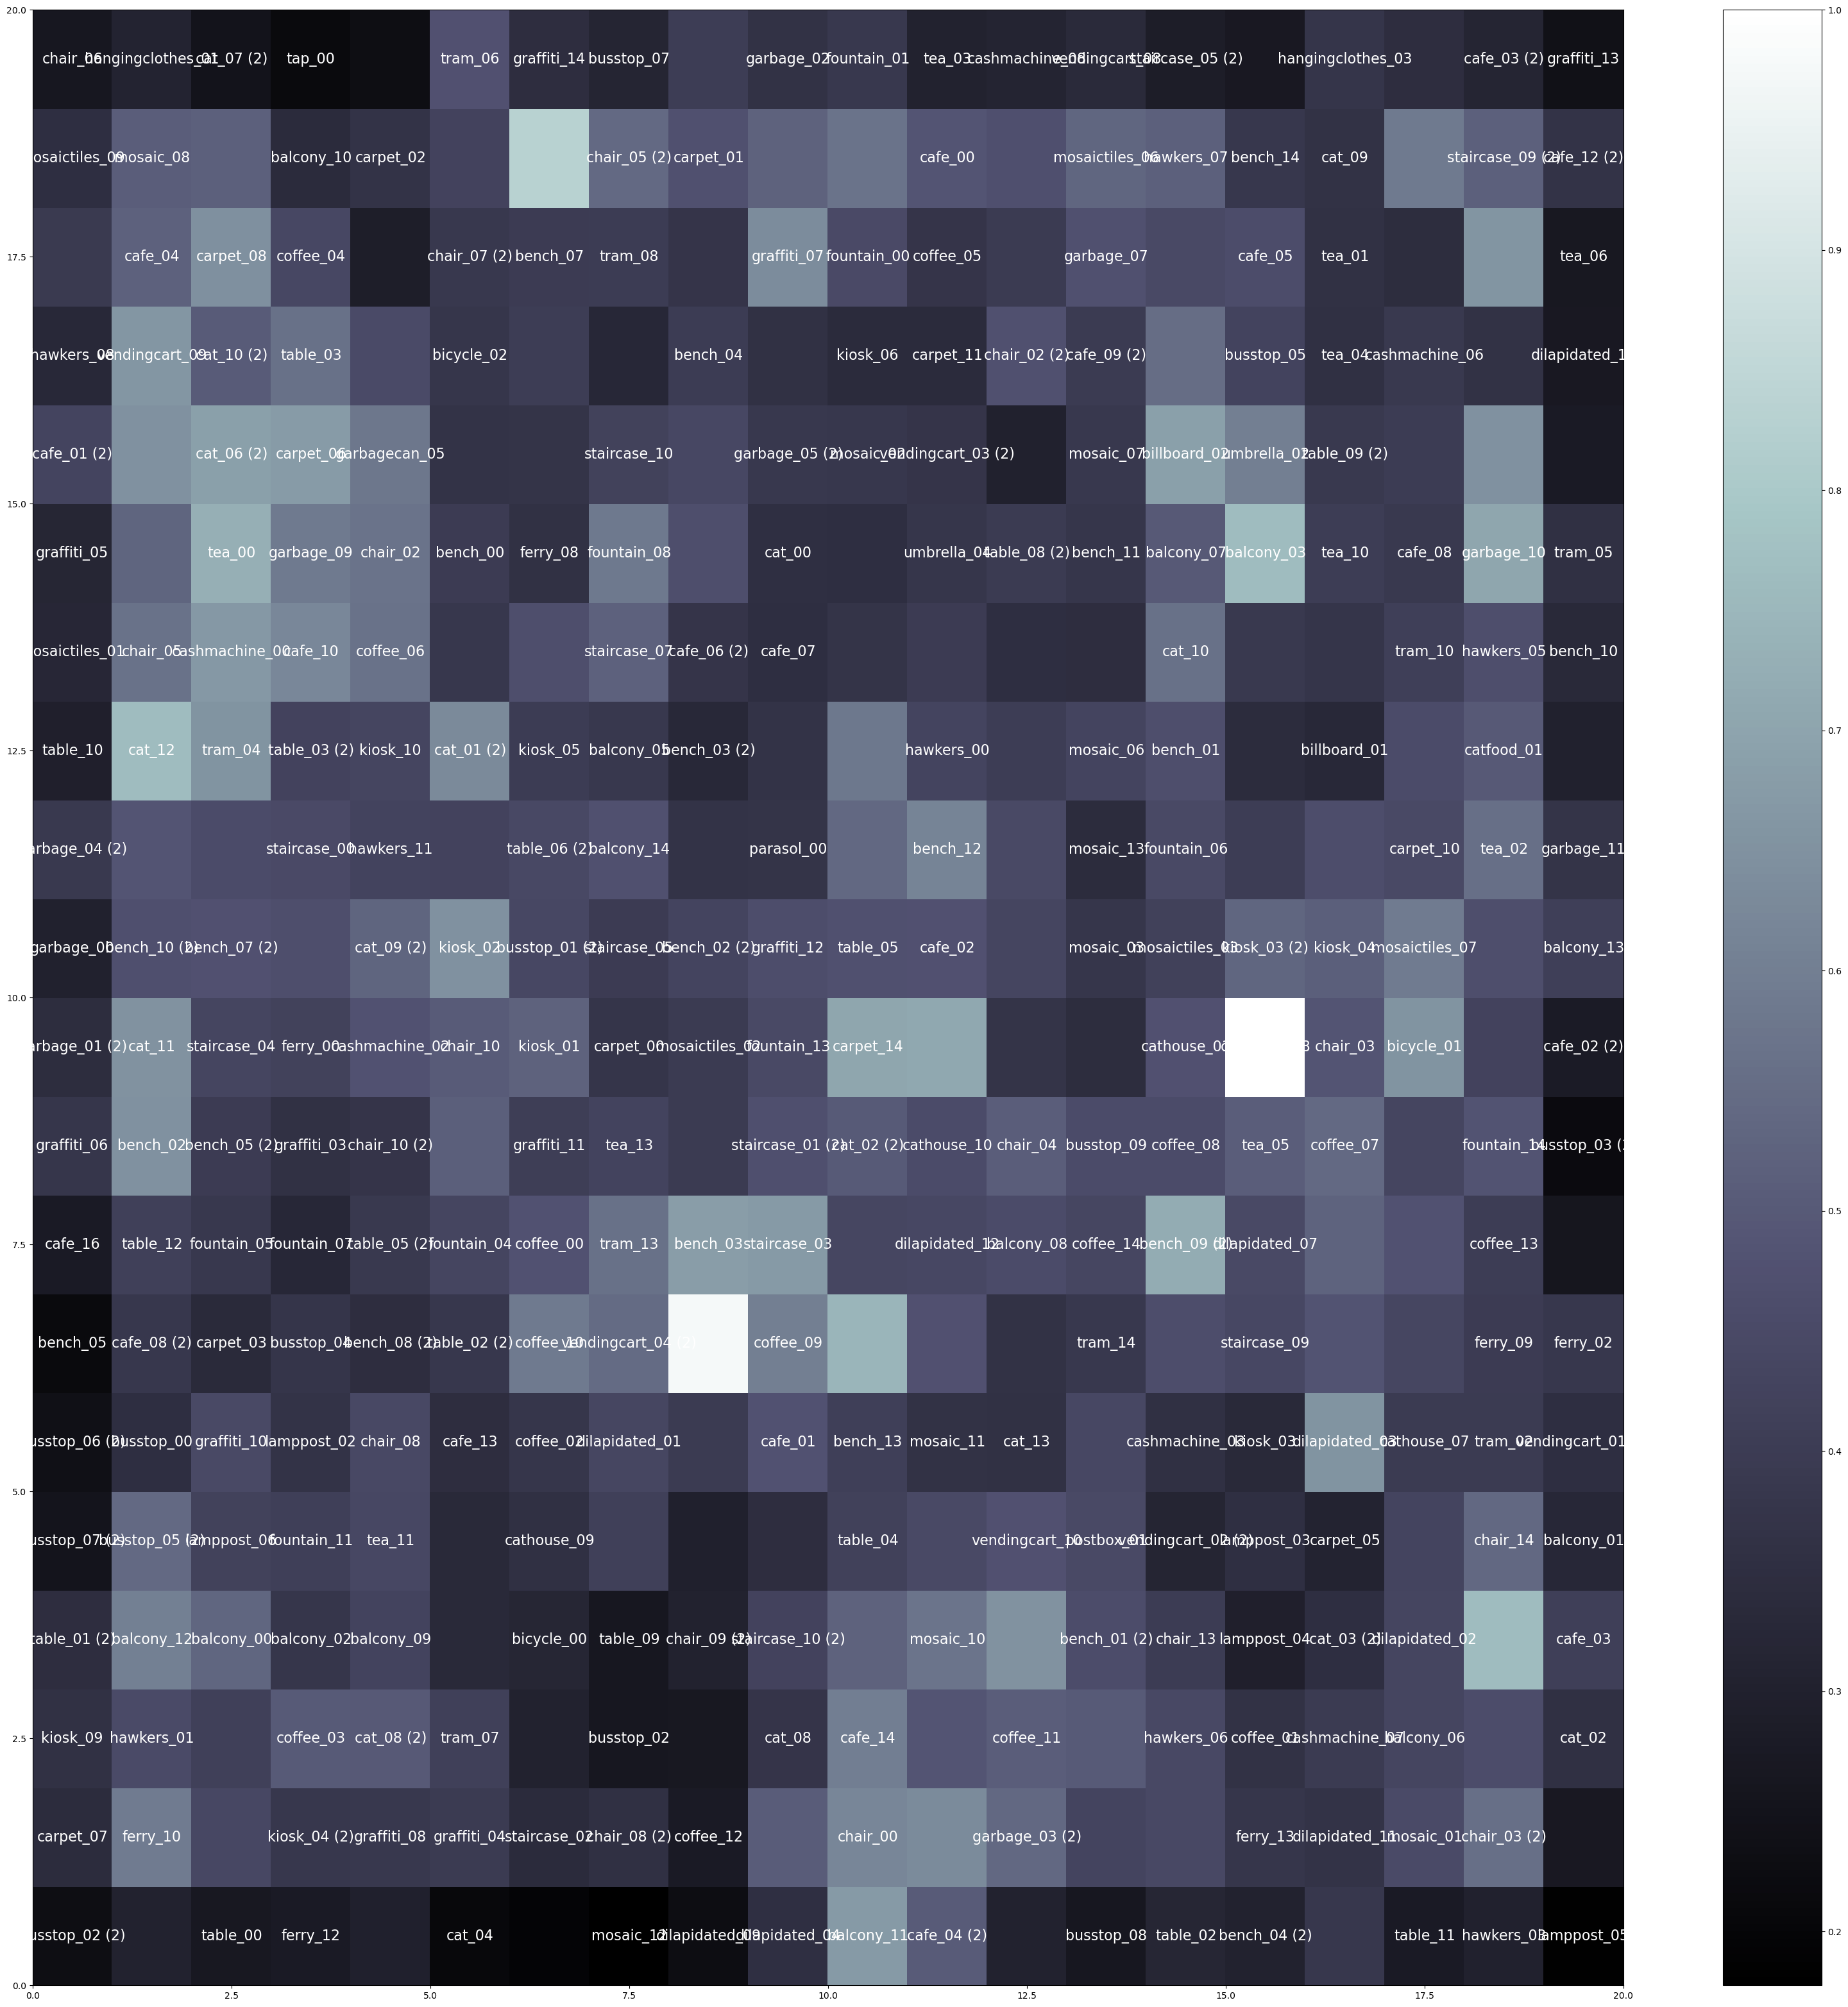

In [18]:
import os
import numpy as np
from minisom import MiniSom
from sklearn.feature_extraction.text import CountVectorizer
from pylab import pcolor, colorbar, plot, text
import matplotlib.pyplot as plt

# Set the path to the folder containing the text files
path_to_folder = "C:/Users/user/Documents/SOM/objects"


# Read the text files and store the contents and file names in separate lists
text_files = []
file_names = []
for file_name in os.listdir(path_to_folder):
    if file_name.endswith(".txt"):
        file_path = os.path.join(path_to_folder, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            text_files.append(text)
            file_names.append(os.path.splitext(file_name)[0])  # remove .txt extension

# Use CountVectorizer to extract features from the text
vectorizer = CountVectorizer(stop_words="english", lowercase=True)
X = vectorizer.fit_transform(text_files).toarray()

# Set the shape of the SOM
som_shape = (20,20)

# Create the SOM
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
print("Training...")
som.train_random(X, 1000)  # Train for 100 iterations

# Create a list to store the file names for each SOM node
node_file_names = [[] for _ in range(som_shape[0] * som_shape[1])]

# Find the file names for each SOM node
for i in range(len(text_files)):
    data_point = X[i]
    node_index = som.winner(data_point)
    node_file_names[node_index[0] * som_shape[1] + node_index[1]].append(file_names[i])

# Increase the figure size
plt.figure(figsize=(40,40))

# Visualize the SOM using the U-matrix and add text labels for each cell
u = som.distance_map().T
pcolor(u, cmap='bone')
colorbar()

# Add text label for each cell
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        idx = i * som_shape[1] + j
        text_color = 'white' if u[i][j] < np.mean(u) else 'black'
        if node_file_names[idx]:
            plt.text(j+0.5, i+0.5, node_file_names[idx][0], color='white', ha='center', va='center', fontsize=16)



# Save the plot with higher dpi
plt.savefig('som.png', dpi=300)
